<a href="https://colab.research.google.com/github/jscienciadados/classification-knn/blob/main/Classificacao_KNN_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificação Binária

## Prevendo o resultado do índice S&P (The Standard & Poor's 500) do
American stock market index (NYSE or NASDAQ)

https://rdrr.io/cran/ISLR/man/Smarket.html

In [1]:
# Instalando os pacotes
install.packages("ISLR", dependencies = T)
install.packages("caret", dependencies = T)
install.packages("e1071", dependencies = T)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘jquerylib’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘numDeriv’, ‘SQUAREM’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘plotrix’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘lazyeval’, ‘iterators’, ‘gower’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ISwR’, ‘corpcor’, ‘rex’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’, ‘BradleyTerry2’, ‘e1071’, ‘earth’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘ellipse’, ‘mda’, ‘mlbench’, ‘MLmetrics’, 

In [2]:
# Carregando os pacotes
library(ISLR)
library(caret)
library(e1071)


Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


## Obtendo os Dados

In [3]:
# Definindo o seed
set.seed(300)

In [4]:
?Smarket

## Análise Exploratória de Dados

In [5]:
# Classificação KNN em R - Carregando e Explorando o Dataset
summary(Smarket)


      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [6]:
# str
str(Smarket)


'data.frame':	1250 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


In [7]:
head(Smarket)
#View(Smarket)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


In [8]:
?createDataPartition

In [9]:
# Split do dataset em treino e teste
indxTrain <- createDataPartition(y = Smarket$Direction, p = 0.75, list = FALSE)

# Dividindo os dados de treino e de teste
dados_treino <- Smarket[indxTrain,]
dados_teste <- Smarket[-indxTrain,]
class(dados_treino)
print("----------------------------")
class(dados_teste)

[1] "data.frame"

[1] "----------------------------"


[1] "data.frame"

In [11]:
#View(indxTrain)

In [12]:
# Verificando a distribuição dos dados originais e das partições
prop.table(table(Smarket$Direction)) * 100
prop.table(table(dados_treino$Direction)) * 100


 Down    Up 
48.16 51.84 


    Down       Up 
48.18763 51.81237 

In [13]:
# Correlação entre as variáveis preditoras
descrCor <- cor(dados_treino[,names(dados_treino) != "Direction"])
descrCor

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029900474,0.02331370,0.0412026458,0.02994867,0.02435802,0.55226999,0.0602928066
Lag1,0.02990047,1.000000000,-0.05050097,-0.0044533034,0.01011903,0.01270514,0.01691916,-0.0184839596
Lag2,0.02331370,-0.050500974,1.00000000,-0.0536594084,-0.01512190,0.00909049,-0.02316819,-0.0229003651
Lag3,0.04120265,-0.004453303,-0.05365941,1.0000000000,-0.01172579,-0.04953048,-0.02362591,0.0004698682
Lag4,0.02994867,0.010119025,-0.01512190,-0.0117257856,1.00000000,-0.01659695,-0.05759648,-0.0464054805
Lag5,0.02435802,0.012705138,0.00909049,-0.0495304847,-0.01659695,1.00000000,-0.01881577,-0.0535165955
Volume,0.55226999,0.016919161,-0.02316819,-0.0236259062,-0.05759648,-0.01881577,1.00000000,0.0474757966
Today,0.06029281,-0.018483960,-0.02290037,0.0004698682,-0.04640548,-0.05351660,0.04747580,1.0000000000


# Classificação KNN em R - Normalização dos Dados (Center e Scale)

# A transformação de "scale" calcula o desvio padrão para um atributo e divide
# cada valor por esse desvio padrão.

# A transformação "center" calcula a média de um atributo e a subtrai de cada valor.

In [14]:
# Função de Normalização
scale.features <- function(df, variables){
  for (variable in variables){
    df[[variable]] <- scale(df[[variable]], center = T, scale = T)
  }
  return(df)
}


In [15]:
# Removendo a variável target dos dados de treino e teste
numeric.vars_treino <- colnames(treinoX <- dados_treino[,names(dados_treino) != "Direction"])
numeric.vars_teste <- colnames(testeX <- dados_teste[,names(dados_teste) != "Direction"])

In [16]:
# Aplicando normalização às variáveis preditoras de treino e teste
dados_treino_scaled <- scale.features(dados_treino, numeric.vars_treino)
dados_teste_scaled <- scale.features(dados_teste, numeric.vars_teste)
View(dados_treino_scaled)
View(dados_teste_scaled)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
1,-1.395576,0.31980367,-0.1734900,-2.2980589,-0.94819537,4.35161544,-0.77778120,0.88865496,Up
2,-1.395576,0.82492679,0.3379394,-0.1831806,-2.34370467,-0.90611987,-0.48435610,0.95463335,Up
3,-1.395576,0.88872262,0.8538316,0.3151028,-0.18062079,-2.26628256,-0.16443348,-0.54117814,Down
4,-1.395576,-0.55760743,0.9189875,0.8177342,0.32902027,-0.15798705,-0.54153494,0.57683927,Up
5,-1.395576,0.52342597,-0.5581778,0.8812153,0.84310847,0.33874541,-0.73761655,0.21441002,Up
6,-1.395576,0.17298588,0.5459029,-0.5579802,0.90803656,0.83981235,-0.33764354,1.28000624,Up
7,-1.395576,1.20333217,0.1879915,0.5177206,-0.56396337,0.90309589,-0.07015811,-0.34233915,Down
8,-1.395576,-0.36534603,1.2403044,0.1690092,0.53625652,-0.53162001,-0.17391680,0.04630069,Up
9,-1.395576,0.01043761,-0.3618174,1.1942730,0.17959672,0.54073260,-0.85392669,1.19956683,Up


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
10,-1.544001,1.1974673326,0.01556826,-0.32035023,1.199723613,0.14266000,-0.73970588,0.1652309,Up
11,-1.544001,0.2847032098,1.09271656,0.06898373,-0.318171446,1.18608942,-0.53056082,-0.4781963,Down
16,-1.544001,-0.4780298023,0.58453218,0.66022811,-0.137207913,-0.48658370,-0.56806458,0.3775209,Up
32,-1.544001,-0.4726394630,-0.17183528,-1.63140974,-1.445388223,-1.71940573,-0.74326463,1.3635630,Up
35,-1.544001,-1.2587306120,-0.65385071,1.62813046,-0.447551917,-0.21842499,-0.75968963,0.0152345,Up
39,-1.544001,0.9234584178,0.48745376,-0.46974583,0.110559916,-1.31230011,-1.12514599,0.4586665,Up
40,-1.544001,0.6063267885,0.83524773,0.57511789,-0.457699405,0.04619367,-1.01455095,0.1152321,Up
42,-1.544001,-2.1975480415,0.18355612,0.62853814,0.866547762,0.47276956,-1.14129724,-3.6092692,Down
44,-1.544001,1.3591775118,-3.65230743,-2.19730214,0.213726042,0.52498528,-0.38848453,-2.1879916,Down


# Classificação KNN em R - Construção e Treinamento do Modelo
?trainControl
?train

In [18]:
?trainControl

In [17]:
set.seed(400)

In [19]:
# Arquivo de controle
ctrl <- trainControl(method = "repeatedcv", repeats = 3) 

In [20]:
# Criação do modelo -> com todas variaveis preditoras
knn_v1 <- train(Direction ~ .,
                data = dados_treino_scaled,
                method = "knn",
                trControl = ctrl,
                # preProcess = c("center","scale"), # Isso é a normalização
                tuneLength = 20)

In [21]:
# Visualizando o modelo
knn_v1

k-Nearest Neighbors 

938 samples
  8 predictor
  2 classes: 'Down', 'Up' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 844, 844, 844, 844, 844, 844, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8831442  0.7656527
   7  0.8873429  0.7739480
   9  0.8930282  0.7853738
  11  0.8969671  0.7932305
  13  0.8912857  0.7816404
  15  0.8909388  0.7808392
  17  0.8930662  0.7850962
  19  0.8948204  0.7887167
  21  0.8990909  0.7972813
  23  0.9023129  0.8037538
  25  0.9037465  0.8065734
  27  0.9047913  0.8086838
  29  0.9044027  0.8079048
  31  0.9008527  0.8006791
  33  0.9026335  0.8042585
  35  0.8983780  0.7955969
  37  0.9008681  0.8006045
  39  0.9012302  0.8012915
  41  0.8994571  0.7977822
  43  0.9019392  0.8027831

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 27.

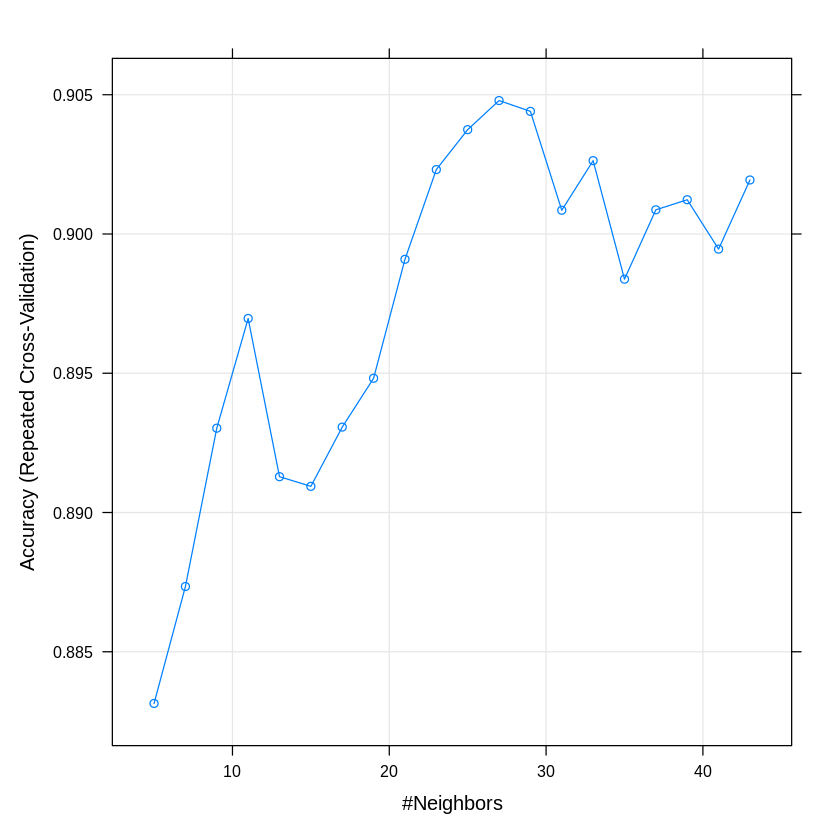

In [22]:
# Numeros de vizinhos x Accuracia
plot(knn_v1)

In [23]:
# Fazendo previsões
knnPredict <- predict(knn_v1, newdata = dados_teste_scaled)
knnPredict


[1] Up   Down Up   Up   Up   Up   Down Down Down Up   Down Up   Up   Down Up  
 [16] Down Up   Down Down Up   Up   Up   Down Down Up   Up   Up   Down Up   Down
 [31] Up   Up   Down Up   Down Down Down Down Down Up   Down Down Up   Down Down
 [46] Up   Down Up   Down Up   Down Up   Up   Down Up   Down Up   Up   Down Up  
 [61] Up   Down Down Down Up   Down Down Down Down Down Up   Up   Down Down Down
 [76] Down Up   Down Up   Down Down Down Down Down Up   Up   Up   Up   Up   Down
 [91] Down Down Up   Up   Down Up   Up   Down Up   Down Up   Up   Up   Up   Down
[106] Up   Up   Up   Down Down Down Up   Up   Up   Down Down Up   Down Down Up  
[121] Down Up   Down Up   Up   Up   Up   Up   Up   Down Up   Down Up   Down Up  
[136] Down Up   Down Up   Up   Up   Up   Up   Down Down Up   Up   Up   Down Down
[151] Up   Up   Up   Down Up   Up   Down Up   Down Up   Up   Up   Down Down Up  
[166] Down Up   Down Down Down Down Down Down Down Up   Down Down Down Up   Down
[181] Up   Down Down Up   Down Up   Up   Down Up   Down Down Up   Down Down Down
[196] Down Up   Down Up   Up   Down Up   Up   Up   Down Up   Down Up   Up   Up  
[211] Down Up   Up   Down Down Up   Up   Up   Down Up   Down Up   Up   Up   Up  
[226] Up   Down Up   Up   Up   Up   Down Up   Up   Down Down Down Down Up   Up  
[241] Down Up   Down Up   Up   Up   Up   Up   Up   Down Down Down Down Up   Down
[256] Up   Down Up   Down Up   Up   Up   Up   Up   Up   Down Down Up   Up   Down
[271] Down Up   Up   Up   Up   Up   Down Up   Down Down Down Up   Up   Down Up  
[286] Up   Up   Up   Up   Up   Down Up   Up   Down Down Up   Down Down Up   Up  
[301] Down Up   Up   Up   Up   Up   Down Up   Up   Down Down Up  
Levels: Down Up

## Confusion Matrix -> Avalia a performance do modelo

In [24]:
# Criando a Confusion Matrix
confusionMatrix(knnPredict, dados_teste$Direction)


Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down  129  12
      Up     21 150
                                          
               Accuracy : 0.8942          
                 95% CI : (0.8547, 0.9261)
    No Information Rate : 0.5192          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7877          
                                          
 Mcnemar's Test P-Value : 0.1637          
                                          
            Sensitivity : 0.8600          
            Specificity : 0.9259          
         Pos Pred Value : 0.9149          
         Neg Pred Value : 0.8772          
             Prevalence : 0.4808          
         Detection Rate : 0.4135          
   Detection Prevalence : 0.4519          
      Balanced Accuracy : 0.8930          
                                          
       'Positive' Class : Down            
                           

# Classificação KNN em R - Aplicando Outras Métricas

In [25]:
# Arquivo de controle
ctrl <- trainControl(method = "repeatedcv",
                     repeats = 3,
                     classProbs = TRUE,
                     summaryFunction = twoClassSummary)

In [26]:
# Treinamento do modelo
knn_v2 <- train(Direction ~ .,
                data = dados_treino_scaled,
                method = "knn",
                trControl = ctrl,
                metric = "ROC",
                # preProcess = c("center","scale"),  # Isso é a normalização
                tuneLength = 20)

In [27]:
knn_v2

k-Nearest Neighbors 

938 samples
  8 predictor
  2 classes: 'Down', 'Up' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 844, 844, 845, 844, 843, 845, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   5  0.9429989  0.8534138  0.8978883
   7  0.9545039  0.8680676  0.9074263
   9  0.9624961  0.8665056  0.9204082
  11  0.9658459  0.8687118  0.9252409
  13  0.9655971  0.8569243  0.9259637
  15  0.9655295  0.8488245  0.9355017
  17  0.9673037  0.8539936  0.9259070
  19  0.9693337  0.8554750  0.9361111
  21  0.9694103  0.8614010  0.9340561
  23  0.9703786  0.8569404  0.9409580
  25  0.9709175  0.8591465  0.9443452
  27  0.9727302  0.8643156  0.9456916
  29  0.9724528  0.8562158  0.9429705
  31  0.9728530  0.8591948  0.9491355
  33  0.9731155  0.8576812  0.9512330
  35  0.9743019  0.8554911  0.9546769
  37  0.9737296  0.8510789  0.9540533
  39  0.9742417  0.8459098  0.9520266
  41  0.9740338  0.84

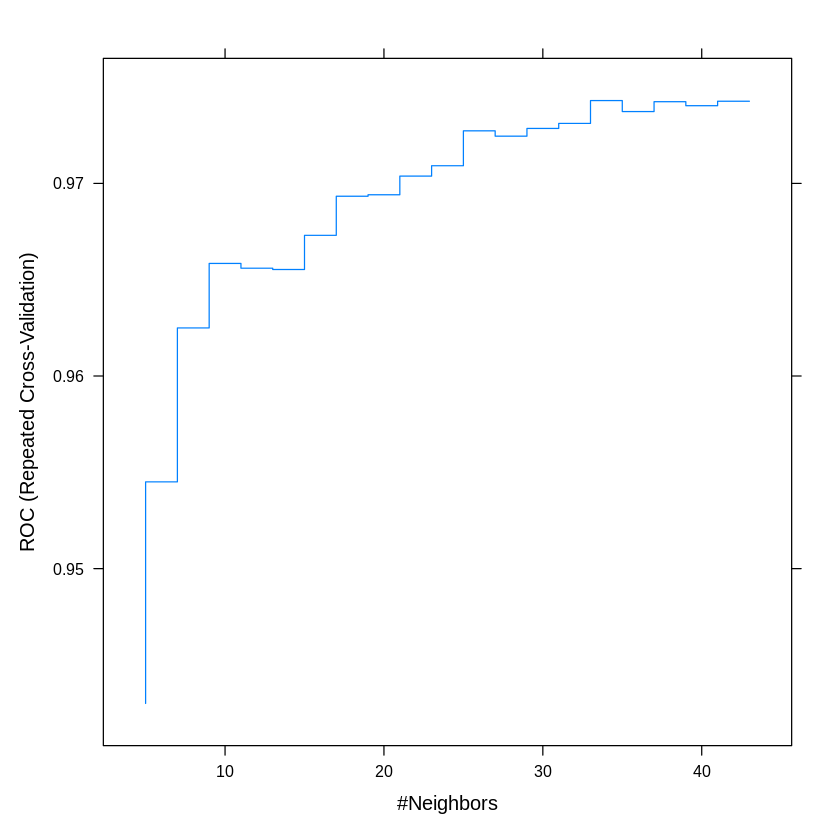

In [28]:
# Número de Vizinhos x Acurácia
plot(knn_v2, print.thres = 0.5, type="S")

In [29]:
# Fazendo previsões
knnPredict <- predict(knn_v2, newdata = dados_teste_scaled)

In [30]:
# Criando a Confusion Matrix
confusionMatrix(knnPredict, dados_teste$Direction)


Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down  128   8
      Up     22 154
                                          
               Accuracy : 0.9038          
                 95% CI : (0.8656, 0.9342)
    No Information Rate : 0.5192          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8067          
                                          
 Mcnemar's Test P-Value : 0.01762         
                                          
            Sensitivity : 0.8533          
            Specificity : 0.9506          
         Pos Pred Value : 0.9412          
         Neg Pred Value : 0.8750          
             Prevalence : 0.4808          
         Detection Rate : 0.4103          
   Detection Prevalence : 0.4359          
      Balanced Accuracy : 0.9020          
                                          
       'Positive' Class : Down            
                           

# Previsões com novos dados

In [31]:
# Preparando dados de entrada
Year = c(2006, 2007, 2008)
Lag1 = c(1.30, 0.09, -0.654)
Lag2 = c(1.483, -0.198, 0.589)
Lag3 = c(-0.345, 0.029, 0.690)
Lag4 = c(1.398, 0.104, 1.483)
Lag5 = c(0.214, 0.105, 0.589)
Volume = c(1.36890, 1.09876, 1.231233)
Today = c(0.289, -0.497, 1.649)


In [33]:
novos_dados = data.frame(Year, Lag1, Lag2, Lag3, Lag4, Lag5, Volume, Today)


In [34]:
novos_dados


Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2006,1.300,1.483,-0.345,1.398,0.214,1.368900,0.289
2007,0.090,-0.198,0.029,0.104,0.105,1.098760,-0.497
2008,-0.654,0.589,0.690,1.483,0.589,1.231233,1.649


In [35]:
str(novos_dados)
class(novos_dados)

'data.frame':	3 obs. of  8 variables:
 $ Year  : num  2006 2007 2008
 $ Lag1  : num  1.3 0.09 -0.654
 $ Lag2  : num  1.483 -0.198 0.589
 $ Lag3  : num  -0.345 0.029 0.69
 $ Lag4  : num  1.398 0.104 1.483
 $ Lag5  : num  0.214 0.105 0.589
 $ Volume: num  1.37 1.1 1.23
 $ Today : num  0.289 -0.497 1.649


[1] "data.frame"

# Normalizando os dados

In [36]:
# Extraindo os nomes das variáveis
nomes_variaveis <- colnames(novos_dados)
nomes_variaveis

[1] "Year"   "Lag1"   "Lag2"   "Lag3"   "Lag4"   "Lag5"   "Volume" "Today"

In [37]:
# Aplicando a função
novos_dados_scaled <- scale.features(novos_dados, nomes_variaveis)
novos_dados_scaled



Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
-1,1.0694055,1.02052862,-0.8961565,0.5214816,-0.3492321,1.00634702,-0.1762273
0,-0.1575041,-0.97812219,-0.1825386,-1.1529531,-0.7785512,-0.99352976,-0.9001717
1,-0.9119014,-0.04240643,1.0786951,0.6314715,1.1277832,-0.01281726,1.0763990


In [38]:
str(novos_dados_scaled)
class(novos_dados_scaled)

'data.frame':	3 obs. of  8 variables:
 $ Year  : num [1:3, 1] -1 0 1
  ..- attr(*, "scaled:center")= num 2007
  ..- attr(*, "scaled:scale")= num 1
 $ Lag1  : num [1:3, 1] 1.069 -0.158 -0.912
  ..- attr(*, "scaled:center")= num 0.245
  ..- attr(*, "scaled:scale")= num 0.986
 $ Lag2  : num [1:3, 1] 1.0205 -0.9781 -0.0424
  ..- attr(*, "scaled:center")= num 0.625
  ..- attr(*, "scaled:scale")= num 0.841
 $ Lag3  : num [1:3, 1] -0.896 -0.183 1.079
  ..- attr(*, "scaled:center")= num 0.125
  ..- attr(*, "scaled:scale")= num 0.524
 $ Lag4  : num [1:3, 1] 0.521 -1.153 0.631
  ..- attr(*, "scaled:center")= num 0.995
  ..- attr(*, "scaled:scale")= num 0.773
 $ Lag5  : num [1:3, 1] -0.349 -0.779 1.128
  ..- attr(*, "scaled:center")= num 0.303
  ..- attr(*, "scaled:scale")= num 0.254
 $ Volume: num [1:3, 1] 1.0063 -0.9935 -0.0128
  ..- attr(*, "scaled:center")= num 1.23
  ..- attr(*, "scaled:scale")= num 0.135
 $ Today : num [1:3, 1] -0.176 -0.9 1.076
  ..- attr(*, "scaled:center")= num 0.48
  ..

[1] "data.frame"

In [39]:
# Fazendo previsões
knnPredict <- predict(knn_v2, newdata = novos_dados_scaled)
cat(sprintf("\n Previsão de \"%s\" é \"%s\"\n", novos_dados$Year, knnPredict))


 Previsão de "2006" é "Down"
 
 Previsão de "2007" é "Down"
 
 Previsão de "2008" é "Up"
